In [2]:
# imports
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
# function for market data
def get_token_market_data(token_id="shiba-inu", currency="usd", days=30):
    # url and parameters
    url = f"https://api.coingecko.com/api/v3/coins/{token_id}/market_chart"
    params = {"vs_currency": currency, "days": days}
    # fetch data
    response = requests.get(url, params=params)
    data = response.json()
    
    # convert to DataFrame
    df = pd.DataFrame({
        "timestamp": [pd.to_datetime(x[0], unit="ms") for x in data["prices"]],
        "price": [x[1] for x in data["prices"]],
        "volume": [x[1] for x in data["total_volumes"]]
    })
    # return DataFrame!!
    return df

# shiba inu for 30 days
df = get_token_market_data("shiba-inu", days=30)
df.head()


,timestamp,price,volume
0,2025-08-16 13:02:51.879,0.000013,2.414690e+08
1,2025-08-16 14:03:24.031,0.000013,2.356638e+08
2,2025-08-16 15:02:57.427,0.000013,2.242006e+08
3,2025-08-16 16:02:16.435,0.000013,2.019026e+08
4,2025-08-16 17:04:09.166,0.000013,1.915812e+08


In [27]:
# function to detect anomalies
def detect_anomalies(df, threshold=2.0):
    # mean + threshold * std
    mean_vol = df["volume"].mean()
    std_vol = df["volume"].std()
    limit = mean_vol + threshold * std_vol
    
    # detect anomalies
    anomalies = df[df["volume"] > limit].copy()
    anomalies["reason"] = "Volume spike"
    # return anomalies and limit
    return anomalies, limit

# detect anomalies
anomalies, limit = detect_anomalies(df)


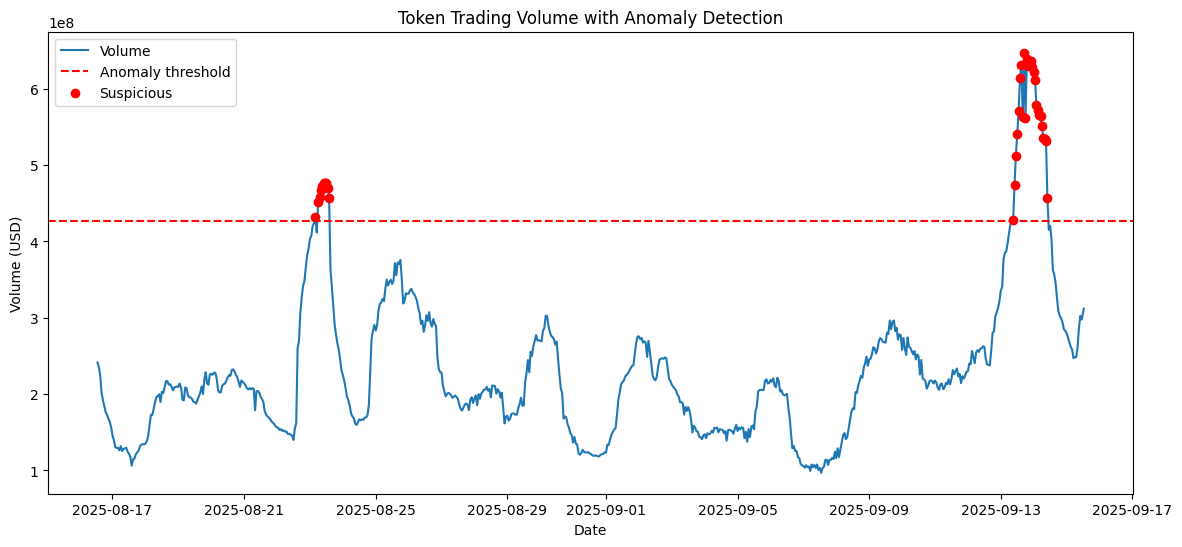

In [28]:
# plot time series with anomalies
plt.figure(figsize=(14,6))
plt.plot(df["timestamp"], df["volume"], label="Volume")
plt.axhline(limit, color="red", linestyle="--", label="Anomaly threshold")
plt.scatter(anomalies["timestamp"], anomalies["volume"], color="red", label="Suspicious", zorder=5)
plt.title("Token Trading Volume with Anomaly Detection")
plt.xlabel("Date")
plt.ylabel("Volume (USD)")
plt.legend()
plt.show()


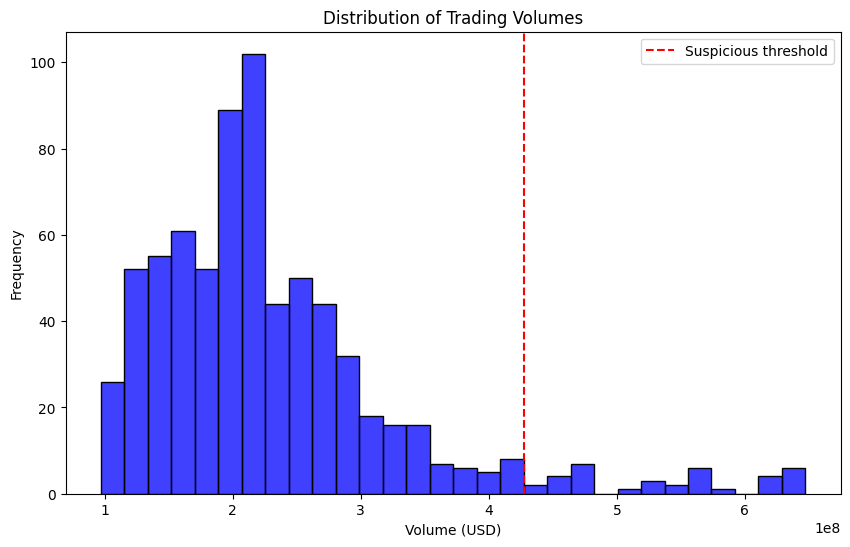

In [29]:
# a histogram too!
plt.figure(figsize=(10,6))
sns.histplot(df["volume"], bins=30, color="blue")
plt.axvline(limit, color="red", linestyle="--", label="Suspicious threshold")
plt.title("Distribution of Trading Volumes")
plt.xlabel("Volume (USD)")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [30]:
if not anomalies.empty:
    print("suspicious detect:")
    for _, row in anomalies.iterrows():
        print(f"- {row['timestamp']} | Volume: {row['volume']:.2f} USD | Reason: {row['reason']}")
else:
    print("less sus")


suspicious detect:
- 2025-08-23 04:02:39.081000 | Volume: 431687067.03 USD | Reason: Volume spike
- 2025-08-23 06:02:32.448000 | Volume: 452265011.17 USD | Reason: Volume spike
- 2025-08-23 07:02:28.618000 | Volume: 458770669.43 USD | Reason: Volume spike
- 2025-08-23 08:02:48.779000 | Volume: 467653219.15 USD | Reason: Volume spike
- 2025-08-23 09:02:39.620000 | Volume: 473039258.86 USD | Reason: Volume spike
- 2025-08-23 10:02:44.483000 | Volume: 476265609.26 USD | Reason: Volume spike
- 2025-08-23 11:02:38.797000 | Volume: 477009128.17 USD | Reason: Volume spike
- 2025-08-23 12:02:53.907000 | Volume: 476616820.45 USD | Reason: Volume spike
- 2025-08-23 13:02:17.956000 | Volume: 470322414.22 USD | Reason: Volume spike
- 2025-08-23 14:01:24.575000 | Volume: 457545212.43 USD | Reason: Volume spike
- 2025-09-13 09:02:36.746000 | Volume: 428004166.29 USD | Reason: Volume spike
- 2025-09-13 10:02:12.364000 | Volume: 473359822.91 USD | Reason: Volume spike
- 2025-09-13 11:02:42.559000 | Vo